In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
import wave
import pyaudio
from audio2numpy import open_audio
from IPython.display import Audio
from scipy import signal

ModuleNotFoundError: No module named 'scipy'

In [2]:
Fs = 48000
Ts = 1/Fs
Nyq = Fs/2
t = np.arange(0,2,Ts)
f = 1000

In [3]:
x = np.sin(2*np.pi*f*t)

In [4]:
Audio(x,rate=Fs)

### infinite clip

In [5]:
def infiniteClip(inData):
    """ Turn it into a square wave"""
    return np.where(inData < 0.0, -1, 1)

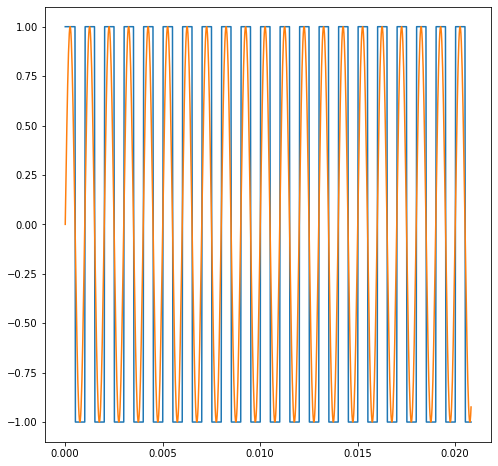

In [6]:
plt.plot(t[:1000],infiniteClip(x)[:1000], t[:1000], x[:1000])

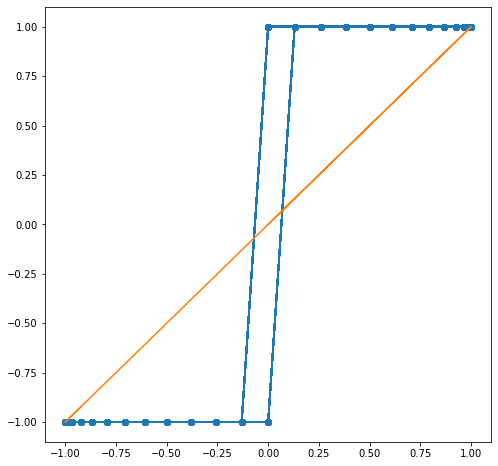

In [7]:
plt.plot(x[1000:5000],infiniteClip(x)[1000:5000], 'o-',x[:1000],x[:1000])

In [8]:
Audio(infiniteClip(x),rate=Fs)

### half wave rectify

In [9]:
def halfwave(inData):
    """ half wave rectify"""
    return np.where(inData >= 0, inData, 0)

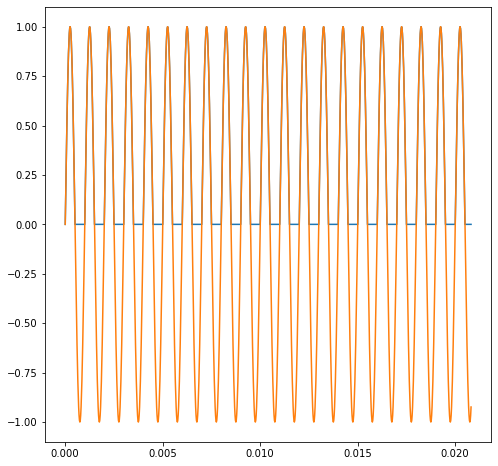

In [10]:
plt.plot(t[:1000],halfwave(x)[:1000], t[:1000], x[:1000])

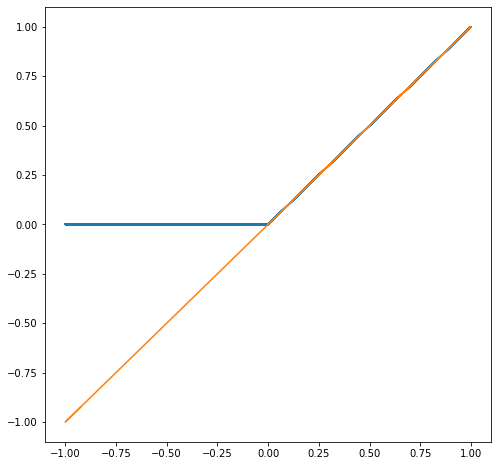

In [11]:
plt.plot(x[:1000],halfwave(x)[:1000],x[:1000],x[:1000])

In [12]:
Audio(halfwave(x),rate=Fs)

### full wave rectify

In [13]:
def fullwave(inData):
    """ full wave rectify"""
    return np.where(inData >= 0, inData, -1*inData)

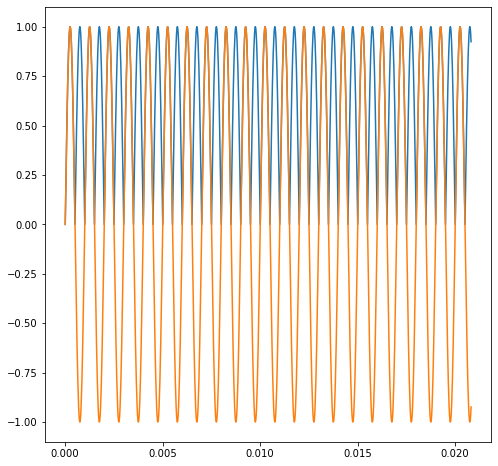

In [14]:
plt.plot(t[:1000],fullwave(x)[:1000], t[:1000], x[:1000])

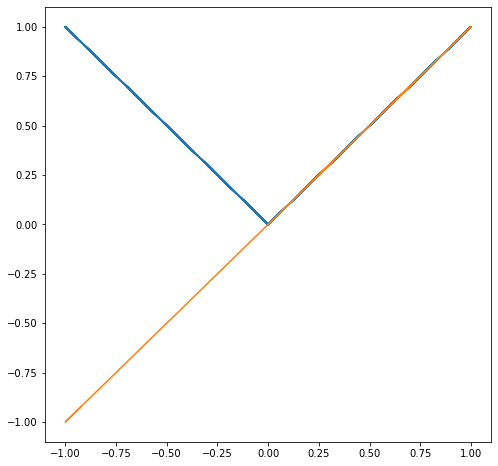

In [15]:
plt.plot(x[:1000],fullwave(x)[:1000],x[:1000],x[:1000])

In [16]:
Audio(fullwave(x),rate=Fs)

### Hard clip

In [17]:
def hardClip(inData, threshold):
    
    return np.where(inData >= threshold, threshold, 
                    np.where(inData <= -threshold, -threshold, inData))

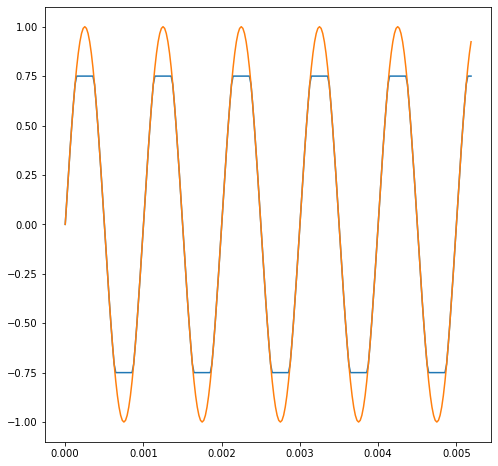

In [18]:
plt.plot(t[:250],hardClip(x, 0.75)[:250], t[:250], x[:250])

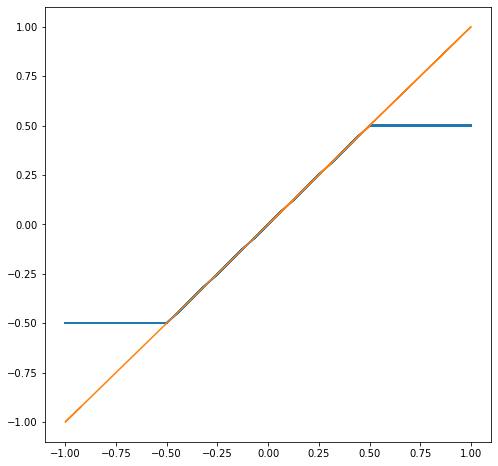

In [19]:
plt.plot(x[:1000],hardClip(x, 0.5)[:1000],x[:1000],x[:1000])

In [20]:
Audio(hardClip(x, 0.1),rate=Fs)

## softclip

### cubic distortion

In [21]:
def cubicDistortion(inData, a):
    return inData - a*(1/3)*inData**3

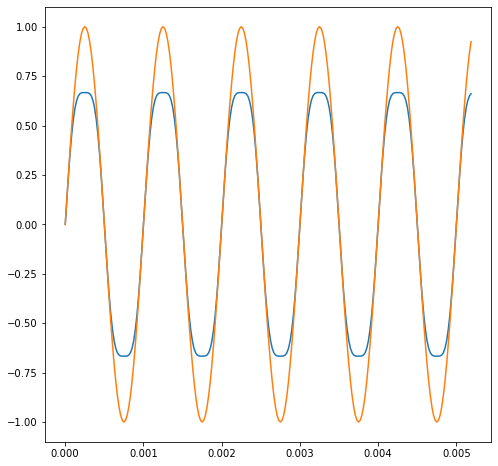

In [22]:
plt.plot(t[:250],cubicDistortion(x, 1)[:250], t[:250], x[:250])

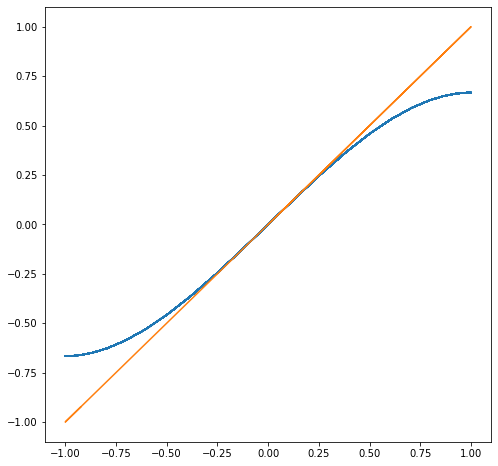

In [23]:
plt.plot(x[:1000],cubicDistortion(x, 1)[:1000],x[:1000],x[:1000])

In [24]:
Audio(cubicDistortion(x, 1),rate=Fs)

### arctan distortion

In [25]:
def arctanDistortion(inData, alpha):
    return (2/np.pi)*np.arctan(inData*alpha)

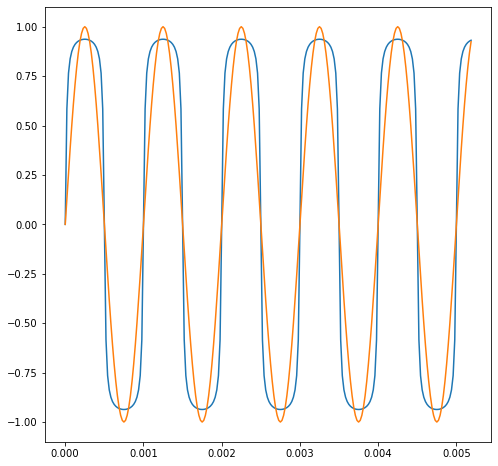

In [26]:
plt.plot(t[:250],arctanDistortion(x, 10)[:250], t[:250], x[:250])

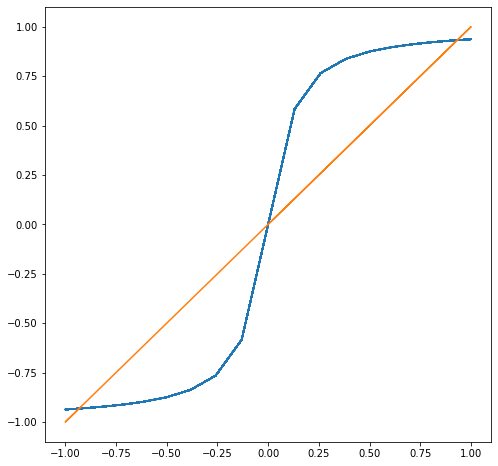

In [27]:
plt.plot(x[:1000],arctanDistortion(x, 10)[:1000],x[:1000],x[:1000])

In [28]:
Audio(arctanDistortion(x, 10),rate=Fs)

### exp soft clipping

In [29]:
def exponential(inData, g):
    return np.sign(inData) * (1 - np.exp(-np.abs(g*inData)))

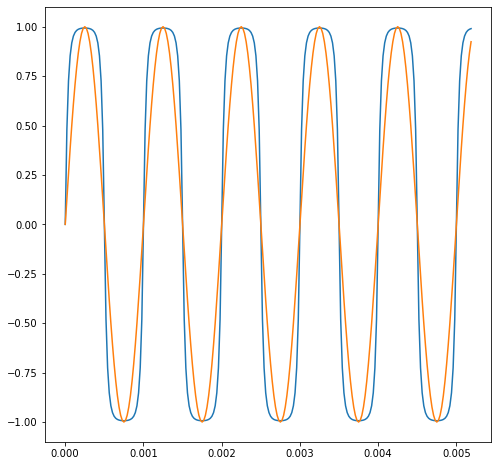

In [30]:
plt.plot(t[:250],exponential(x, 5)[:250], t[:250], x[:250])

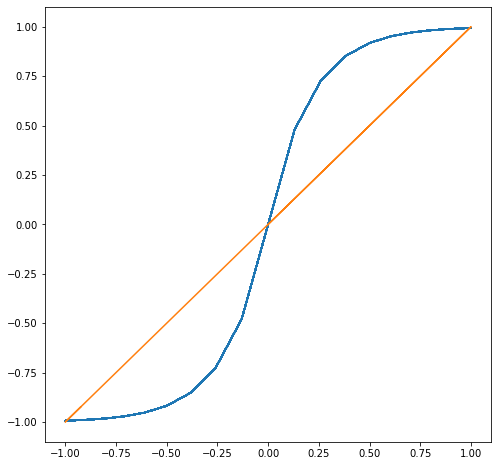

In [31]:
plt.plot(x[:1000],exponential(x, 5)[:1000],x[:1000],x[:1000])

In [32]:
Audio(exponential(x, 5),rate=Fs)

### piecewise overdrive

In [33]:
def piecewise(inData):
    return np.where(np.abs(inData) <= (1/3), 2 * inData, 
                    np.where(np.abs(inData) > (2/3), np.sign(inData), 
                             np.sign(inData) * (3 - (2 - 3 * np.abs(inData))**2)/3))

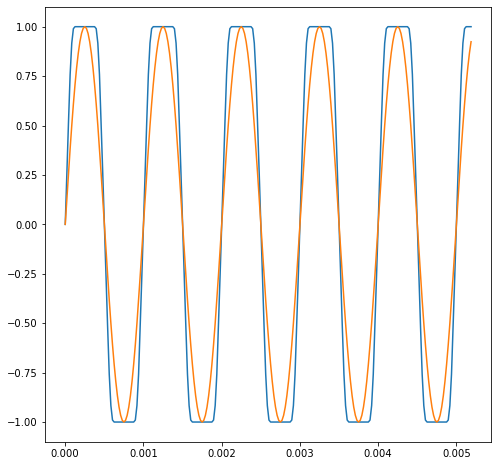

In [34]:
plt.plot(t[:250],piecewise(x)[:250], t[:250], x[:250])

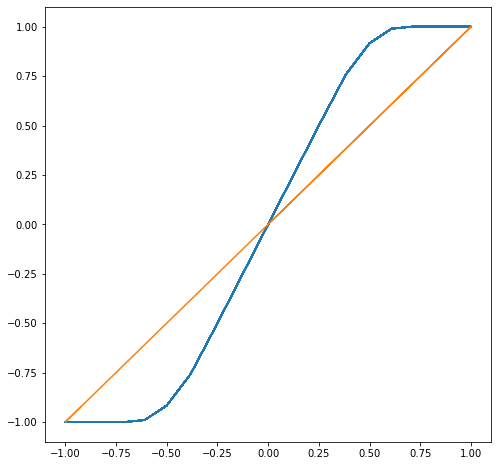

In [35]:
plt.plot(x[:1000],piecewise(x)[:1000],x[:1000],x[:1000])

In [39]:
Audio(piecewise(x),rate=Fs)

### diode clipping

In [36]:
def diode(inData):
    Vt = 0.0253 # thermal voltage
    eta = 1.68 # emission coefficient
    Is = 0.105 # saturatin current
    
    return Is * (np.exp(0.1*inData/(eta*Vt))-1)

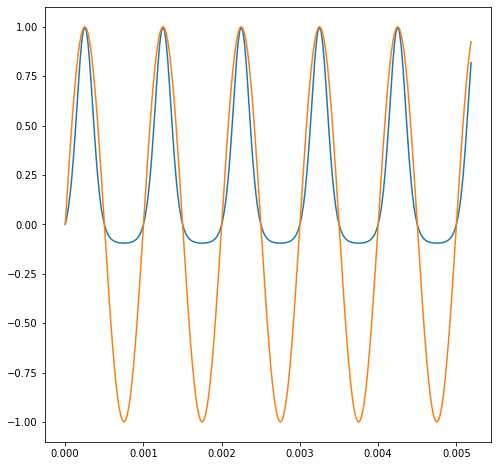

In [37]:
plt.plot(t[:250],diode(x)[:250], t[:250], x[:250])

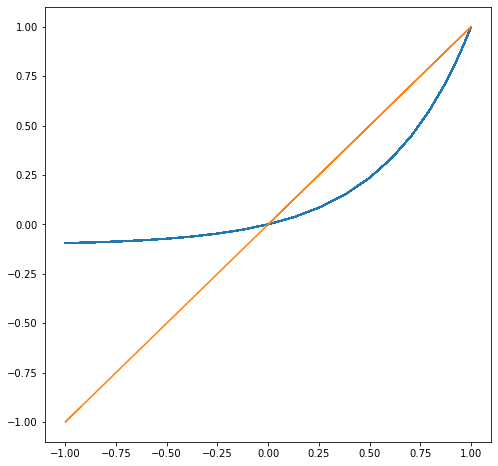

In [38]:
plt.plot(x[:1000],diode(x)[:1000],x[:1000],x[:1000])

In [40]:
Audio(diode(x),rate=Fs)

## Bit reduction

### bit reduction

In [82]:
y = np.sin(2*np.pi*100*t)

In [80]:
def bitReduct(inData, nBits):
    ampValues = 2**nBits
    prepInput = 0.5*inData + 0.5 # scale 0 to 1
    
    scaleInput = ampValues * prepInput
    roundInput = np.rint(scaleInput)
    
    prepOut = roundInput / ampValues
    
    return 2 * prepOut - 1

4


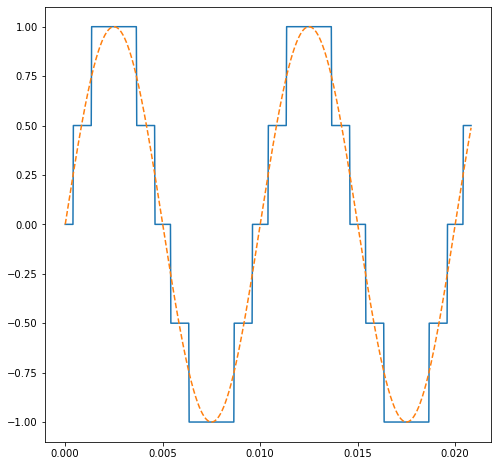

In [92]:
plt.plot(t[:1000],bitReduct(y,2)[:1000],t[:1000], y[:1000], '--')

16


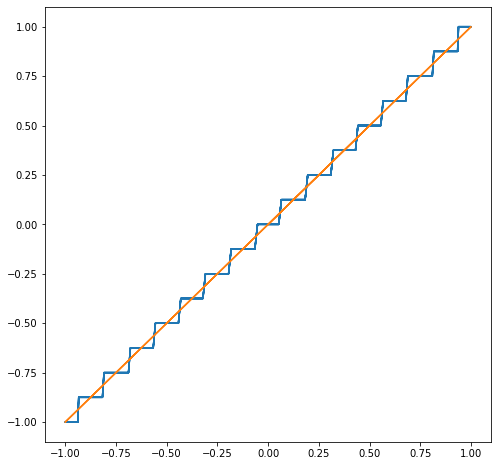

In [93]:
plt.plot(y[:1000],bitReduct(y,4)[:1000],y[:1000],y[:1000])

In [94]:
Audio(bitReduct(y,2),rate=Fs)

4


## Harmonic analysis of distortion effects 

### Asymmetrical

In [96]:
def asymmetrical(inData, dc):
    x = inData + dc
    x = np.where(np.abs(x)>1,np.sign(x), x)
    
    return x - (1/5)*x**5 - dc

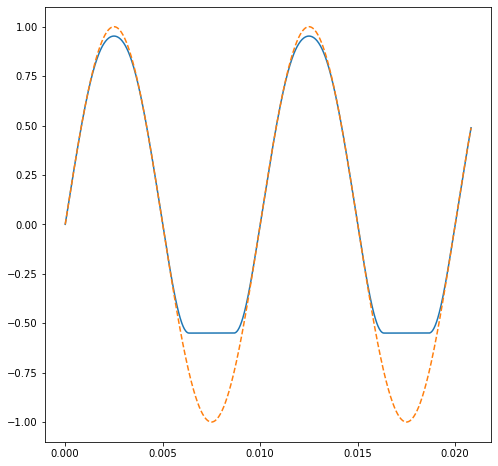

In [110]:
plt.plot(t[:1000],asymmetrical(y,-0.25)[:1000],t[:1000], y[:1000], '--')

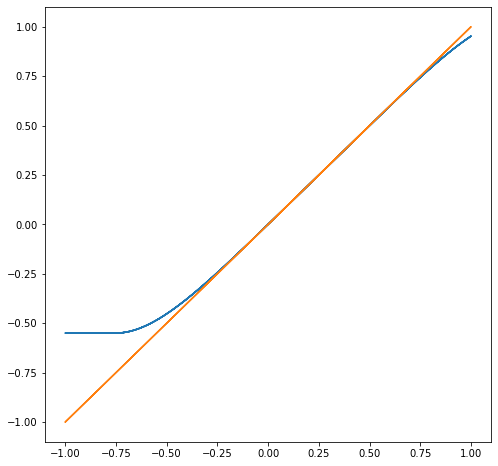

In [111]:
plt.plot(y[:1000],asymmetrical(y,-0.25)[:1000],y[:1000],y[:1000])

In [112]:
Audio(asymmetrical(x,1),rate=Fs)

## Parallel distortion

In [113]:
filename = "textbookcode-master\Ch_13\AcGtr.wav"
[carrier,Fs] = open_audio(filename)

In [121]:
alpha = 8
dist = arctanDistortion(carrier, alpha)
mix = 100 # 0 to 100
g = mix/100

out = g*dist+(1-g)*carrier

In [122]:
Audio(out,rate=Fs)